<a href="https://colab.research.google.com/github/AdityaShirke8/DS/blob/main/Data_Science_Internship_(Chance_of_Admission_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chance of Admission Prediction**

**Objective**

In this project, we will use a dataset containing various factors that might influence a student's chance of admission to a university. We'll build a machine learning model to predict the probability of admission based on these factors.

**Data Source**

GitHub

Import **Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Import** **Data**

In [ ]:
data = pd.read_csv('Admission_Predict_Data.csv')

**Describe Data**

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Actual Coding**

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
data.shape

(500, 9)

In [ ]:
data.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chan

**Exploratory Data Analysis**

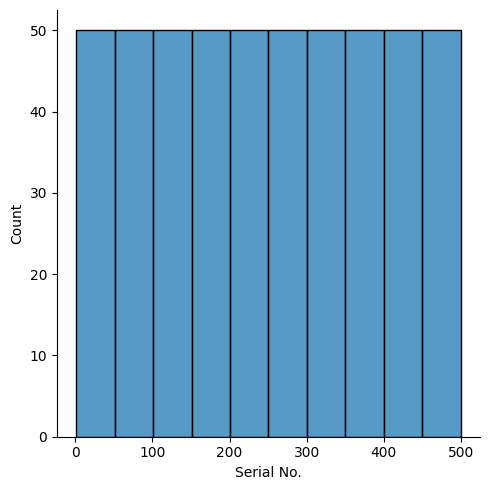

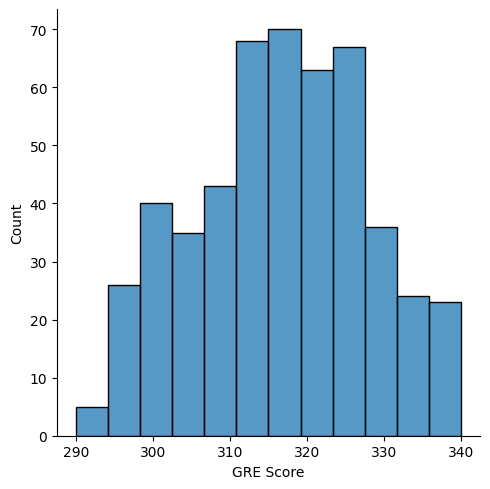

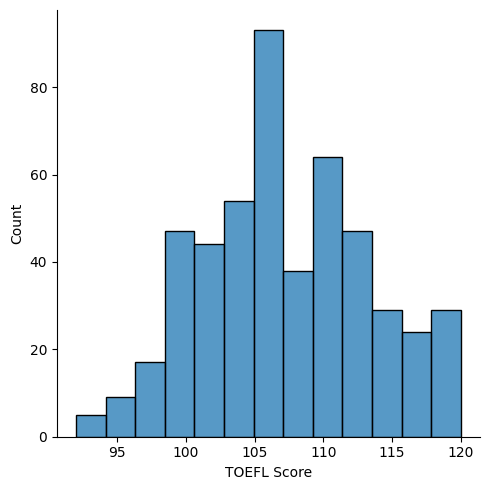

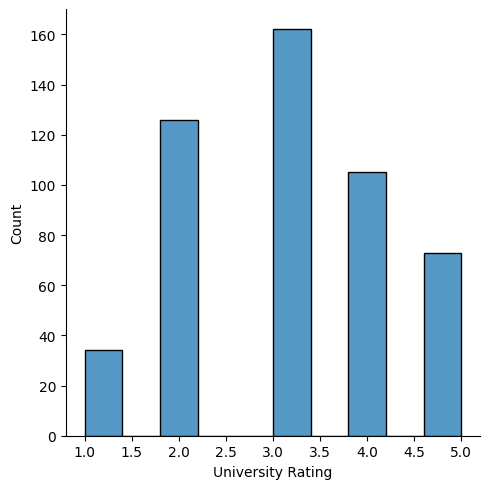

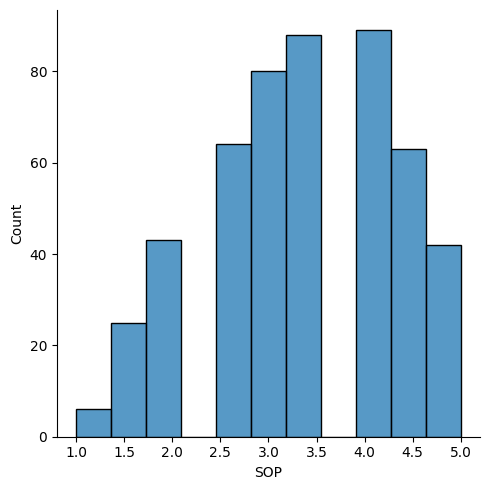

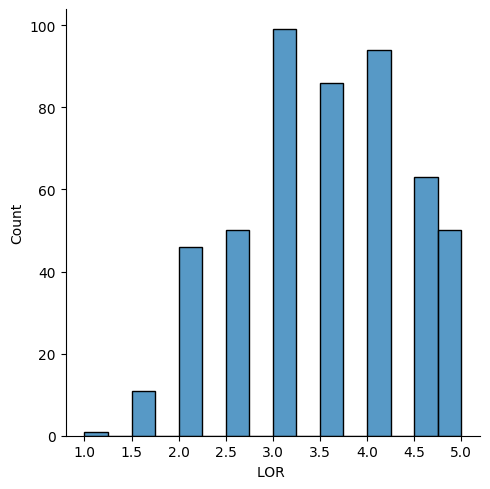

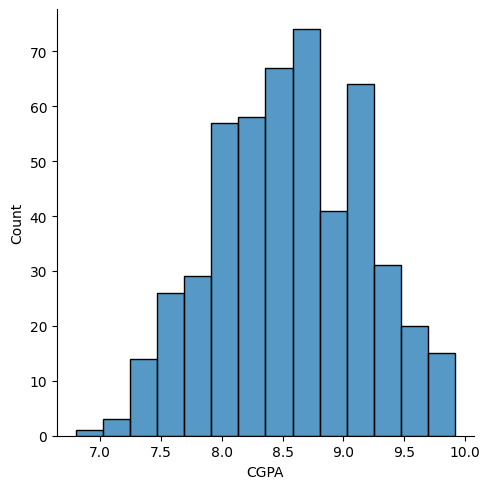

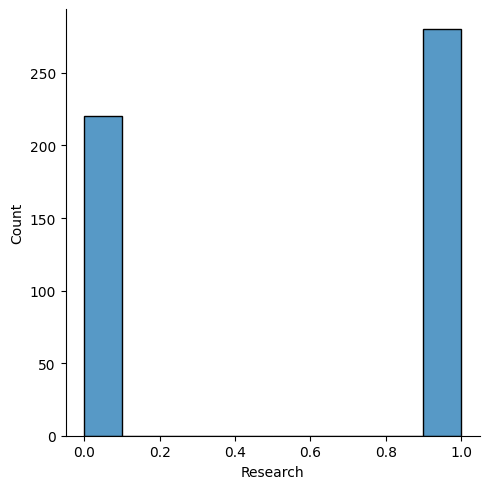

In [ ]:
[sns.displot(data[i]) for i in list(data.columns)[:-1]]

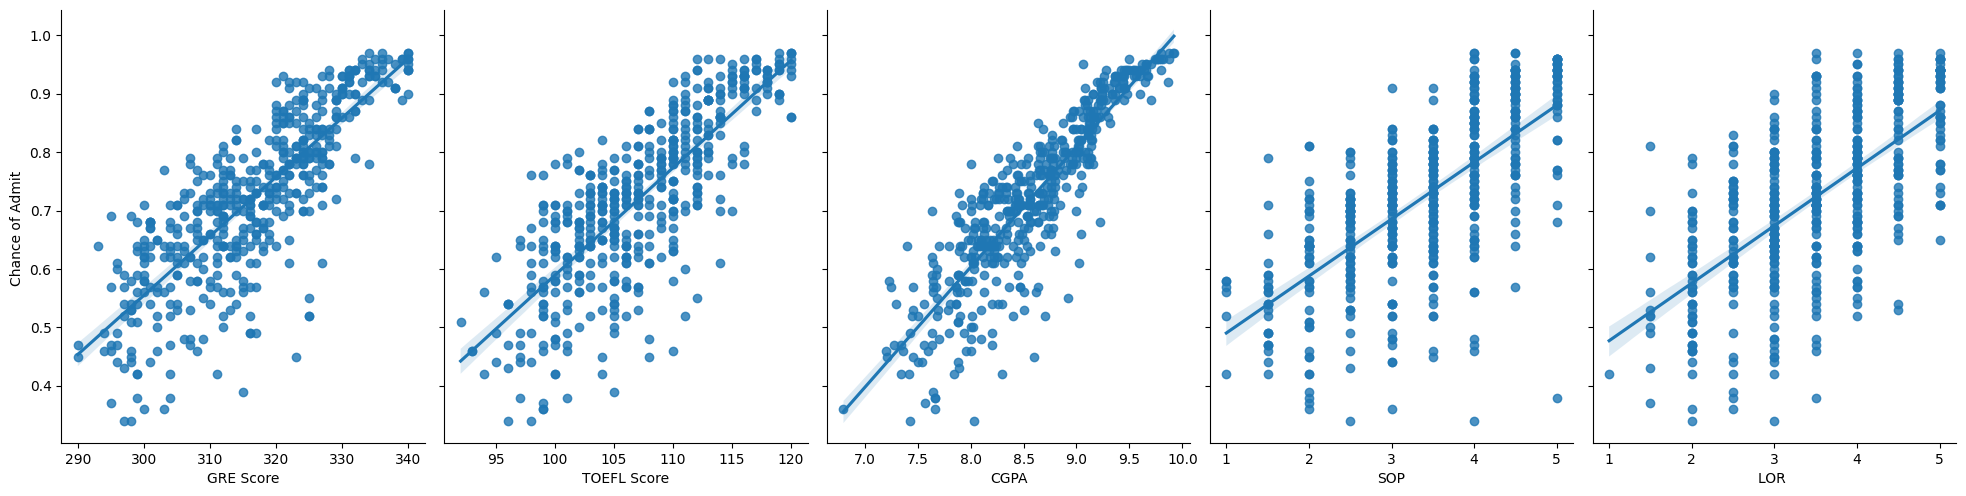

In [ ]:
sns.pairplot(data,x_vars=['GRE Score','TOEFL Score','CGPA','SOP','LOR '],y_vars=['Chance of Admit '],height=5, aspect=.8, kind='reg')

In [ ]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

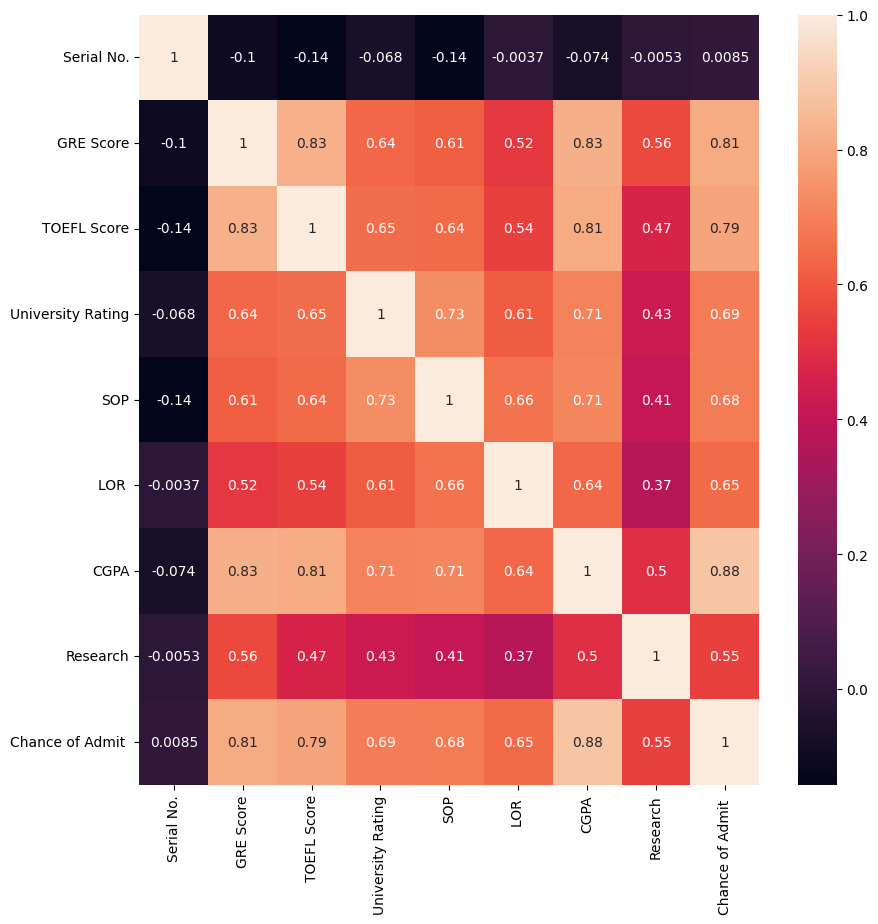

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)

**Selection of the Variables**

In [ ]:
list(data.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [ ]:
x = data[['GRE Score','TOEFL Score','SOP','LOR ','CGPA']]
x

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65
1,324,107,4.0,4.5,8.87
2,316,104,3.0,3.5,8.00
3,322,110,3.5,2.5,8.67
4,314,103,2.0,3.0,8.21
...,...,...,...,...,...
495,332,108,4.5,4.0,9.02
496,337,117,5.0,5.0,9.87
497,330,120,4.5,5.0,9.56
498,312,103,4.0,5.0,8.43


In [ ]:
y=data[['Chance of Admit ']]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


**Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(400, 5)

In [ ]:
y_train.shape

(400, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [ ]:
Model.fit(x_train,y_train)

LinearRegression()

**Prediction**

In [ ]:
y_pred=Model.predict(x_test)

In [ ]:
y_pred[:10]

array([[0.65837287],
       [0.85240971],
       [0.76898608],
       [0.87392044],
       [0.57617348],
       [0.65425063],
       [0.53049811],
       [0.70513767],
       [0.52966893],
       [0.76665308]])

In [ ]:
y_test.head(10)

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


**Model Score**

In [ ]:
print("Model training score :",round(Model.score(x_train,y_train),2)*100, '%')

Model training score : 83.0 %


In [ ]:
print("Model testing score :",round(Model.score(x_test,y_test),2)*100, '%')

Model testing score : 76.0 %


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.047534189308771874


In [ ]:
print("Model Accuracy : ",round((1 - metrics.mean_absolute_error(y_test,y_pred)), 2)*100,"%")

Model Accuracy :  95.0 %


In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Model, file)